# Machine Learning 

Zhentao Shi

## Introduction

Machine learning and artificial intelligence:

* Technology or alchemy?
* Statistics or biology?

* [Tom Sargent](https://www.project-syndicate.org/commentary/artificial-intelligence-new-economic-models-by-thomas-j-sargent-2019-11)


## Reference

* [ISLR] James, Gareth., Witten, Daniela., Hastie, Trevor., & Tibshirani, Robert. (2017). An introduction to statistical learning.  (Open access at https://www.statlearning.com/)
* [ESL] Friendman, Hastie and Tibshirani (2001, 2008): Elements of Statistical Learning (Open access at https://hastie.su.domains/Papers/ESLII.pdf)

* Athey (2018) 
* Mullainathan and Spiess (2017)

## Supervised Learning

* Connection between $X$ and $Y$
* Regression and classification

A set of data fitting procedures focusing on out-of-sample prediction
* Repeat a scientific experiment for $n$ times and obtain a dataset $(y_i, x_i)_{i=1}^n$.
* How to best predict $y_{n+1}$ given $x_{n+1}$?

# Unsupervised Learning

* Only about $X$
* Density estimation, principal component analysis, and clustering


# Conventional Statistics

* Consistency
* Asymptotic distribution (hopefully normal)
* Efficiency

# Machine Learning's Responses

* Efficiency is mostly irrelevant given big data
* Statistical inference may not be the goal
    * Recommendation system on Amazon or Taobao
    * Care about the prediction accuracy, not the causal link
* Is there a data generating process (DGP)?

# First Generation

## Nonparametric Estimation

* *Parametric*: a finite number of parameters
* *Nonparametric*: an infinite number of parameters

* Some ideas in nonparametric estimation is directly related to machine learning

# Example: Density Estimation

* Density estimation given a sample $(x_1,\ldots,x_n)$
* If drawn from a parametric family, MLE for estimation
* Misspecification 

* Histogram is nonparametric
    * If grid too fine, small bias but large variance
    * If grid too coarse, small variance but large bias
    

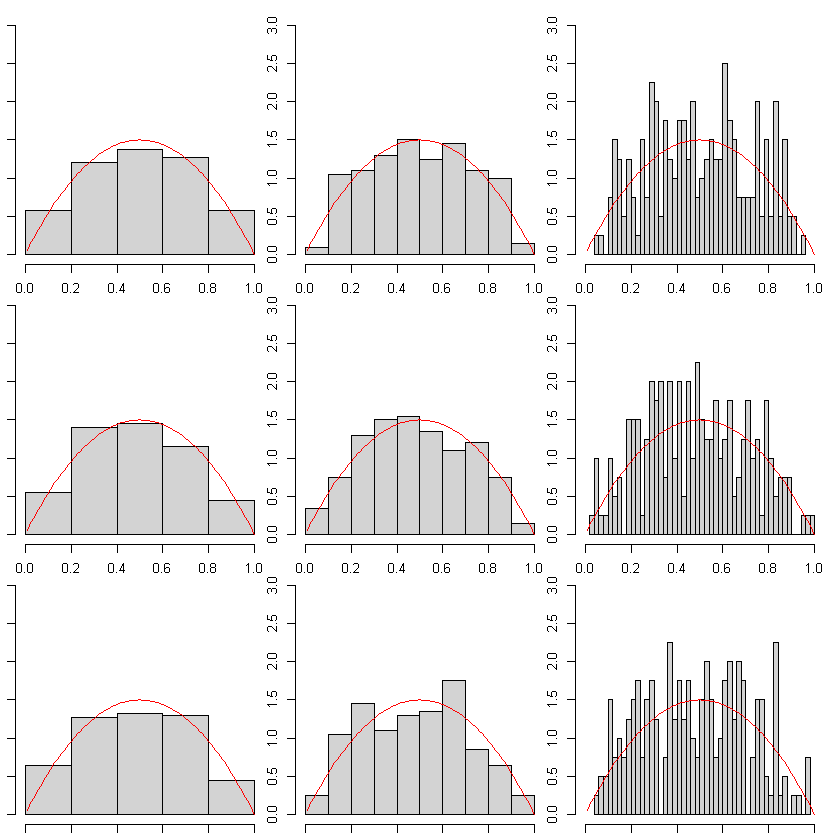

In [1]:
n <- 200

par(mfrow = c(3, 3))
par(mar = c(1, 1, 1, 1))

x_base <- seq(0.01,1,by = 0.01)
breaks_list = c(4, 12, 60)

for (ii in 1:3){
  x <- rbeta(n, 2, 2) # beta distribution
  for ( bb in breaks_list){
    hist(x, breaks = bb, main="", freq = FALSE, ylim = c(0,3),xlim = c(0,1))
    lines( y = dbeta( x_base, 2, 2), x = x_base , col = "red" )
  }
}


## Variance-Bias Tradeoff

![](graph/bias_variance.png)

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

* Restrict the class of functions to search for minimizer
    * Assume differentiability
* One way is kernel method based on density estimation

# Series Estimation

* Series expansion to approximate $f(x)$
* Generates many additive regressors
    * Ex: bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$.
    * In finite sample, choose a finite $K$, usually much smaller than $n$
    * Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

* Bias-variance trade-off
    * Big $K$: small bias and large variance 
    * Small $K$: small variance and large bias

# Penalization

* Specify a sufficiently large $K$, and then add a penalty term to control the complexity
* Eg: *Ridge regression*: 
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. 

In compact notation, let $Y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2
$$

# Tuning Parameter

* *Information criterion*: AIC, BIC
* *Cross validation*


* Active statistical research, but has little economics

# Econometrics Workflow

![](graph/metric_flow.png)

## Data Splitting

![ ](graph/ML_flow.png)


## Data Splitting


<!-- \begin{figure} -->
<!-- \centering -->
<!-- \begin{tikzpicture}[node distance = 10 mm, thick, scale=1, transform shape] -->
<!-- % Nodes -->
<!--   \node[ellipse, draw] -->
<!--     (a) [label=above left:$data$]{Training Data}; -->
<!--   \node[ellipse, draw, right = of a] -->
<!--     (b) {Validation Data}; -->
<!--   \node[ellipse, draw=red,fill=black!0, right = of b, text width=3cm, align=center] -->
<!--     (c) {(Out of Sample) Testing Data}; -->
<!--   \node[ellipse, draw=blue,fill=black!0, below right = 20 mm of a] -->
<!--     (d) {Fitted model} ; -->
<!--   \node[ellipse, draw=blue,fill=black!0, right= 10 mm of d, text width=3.5cm, align=center] -->
<!--     (e) {Best tuning Parameter (Model)}; -->
<!--   \node[ellipse, draw, left = 20 mm of d, loosely dashed] -->
<!--     (f) -->
<!--     [label = below: \textcolor{black!40}{Many Sets of Tuning Parameters}] -->
<!--     {Model}; -->

<!-- % Arrows -->
<!--     \draw [->, black] (a) -- (d); -->
<!--     \draw [->, blue] (d) -- (b); -->
<!--     \draw [->, blue] (b) -- (e); -->
<!--     \draw [->, blue] (e) -- (c); -->
<!--     \draw [->, black, loosely dashed] (f) -- (d); -->

<!-- % Caption     -->
<!--   \node[below = of d] { -->
<!--         \begin{tabular}{l} -->
<!--             $\bullet$ Data splitting can be done by cross validation \\ -->
<!--             $\bullet$ A data driven approach for feature selection -->
<!--         \end{tabular}}; -->
<!-- \end{tikzpicture} -->
<!-- \caption{Learning workflow} -->
<!-- \end{figure} -->


The workflow of machine learning methods is quite different from econometrics. The main purpose is often prediction instead of interpretation.
They use some "off-the-shelf" generic learning methods, and
the models are measured by their performance in prediction.
In order to avoid overfitting it is essential to tune at least a few tuning parameters.

Most machine learning methods take an agnostic view about the DGP, and they explicitly
acknowledge model uncertainty. To address the issue of model selection (tuning parameter selection),
in a data rich environment we split the data into three parts. A *training dataset*
is used to fit the model parameter given the tuning parameters. A *validation dataset* is
used to compare the out-of-sample performance under different tuning parameters.
It helps decide a set of desirable tuning parameters. Ideally, the *testing sample* should be
kept by a third party away from the modeler. The testing sample is the final
judge of the relative merit of the fitted models.

The R package `caret` (Classification And REgression Training) provides a framework for many machine learning methods.
The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross-sectional data and time series.



### Cross Validation

An $S$-fold cross validation partitions the dataset into $S$ disjoint sections. In each iteration, it picks one of the sections as the validation sample and the other $S-1$ sections as the training sample, and computes an out-of-sample goodness-of-fit measurement, for example *mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality,  or *mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, and average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. If $S=n-1$, it is called *leave-one-out cross validation*, but it can be computationally too expensive when  $n$ is big. Instead, in practice we can  $S=5$ for 10, called 5-fold cross validation or 10-fold cross validation, respectively.



\begin{figure}
\centering
\includegraphics[width = 14cm]{graph/CV_Figure}
\caption{Rolling window time series cross validation}
\end{figure}



In time series context, cross validation must preserve the dependence structure. If the time series is stationary, we can partition the data into $S$ consecutive blocks. If the purpose is ahead-of-time forecasting, then we can use nested CV. The figure shows a nested CV with fixed-length rolling window scheme, while the sub-training data can also be an extending rolling window. 




## Variable Selection and Prediction

In modern scientific analysis, the number of covariates $x_i$ can be enormous.
In DNA microarray analysis, we look for association between a symptom and genes.
Theory in biology indicates that only a small handful of genes are involved,
but it does not pinpoint which ones are the culprits.
Variable selection is useful to identify the relevant genes, and then we can
think about how to edit the genes to prevent certain diseases and better people's life.

Explanatory variables are abundant in some empirical economic examples.
For instance, a questionnaire from the [UK Living Costs and Food Survey](https://discover.ukdataservice.ac.uk/series/?sn=2000028), a survey
widely used for analysis of demand theory and family consumption,
consists of thousand of questions.
@giannone2017economic [link](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3031893) experiment variable selection methods in 6 widely used economic datasets with many predictors.

**Hazard of model selection** To elaborate the distortion of test size when the $t$ statistic is selected from two models in pursuit of significance.
$$
\begin{pmatrix}y\\
x_{1}\\
x_{2}
\end{pmatrix}\sim N\left(0,\begin{pmatrix}1 & 0 & 0\\
0 & 1 & \sqrt{0.5}\\
0 & \sqrt{0.5} & 1
\end{pmatrix}\right)
$$
Both $x_1$ and $x_2$ are independent of $y$. The test size dependens on the correlation between the two regressors.
If the test is conducted for a single model, the size is the pre-specified 10%.
If we try two models, the size is inflated to about 17%. 


In [ ]:
n <- 100
Rep <- 5000

t_stat <- function(y, x) {
  beta_hat <- sum(x * y) / sum(x^2)
  e_hat <- y - beta_hat * x
  sigma2_hat <- var(e_hat)
  t_stat <- beta_hat / sqrt(sigma2_hat / sum(x^2))
  return(t_stat)
}

res <- matrix(NA, Rep, 2)

for (r in 1:Rep) {
  y <- rnorm(n)
  x1 <- rnorm(n)
  x2 <- sqrt(0.5) * x1 + sqrt(0.5) * rnorm(n)

  res[r, ] <- c(t_stat(y, x1), t_stat(y, x2))
}

print(mean(apply(abs(res), 1, max) > qnorm(0.95)))


# `Caret` Package

* R package `caret` (Classification And REgression Training): a framework for many machine learning methods
* The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross sectional data and time series.

## Variable Selection

* Number of covariates $x_i$ can be enormous.
    * DNA microarray
    * UK Living Costs and Food Survey
    * Giannone, Lenza, and Primiceri (2017): Illusion of sparsity

* Conventional attitude: prior knowledge
* Recently economists wake up from the long lasting negligence.
    * Stock and Watson (2012): forecasting 143 US macroeconomic indicators.
    * A horse race of several variable selection methods.

# Lasso

* least-absolute-shrinkage-and-selection-operator
(Lasso) (Tibshirani, 1996)
* Penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. 

Lasso shrinks some coefficients exactly to 0, in a wide range of values of $\lambda$


![ ](graph/lasso_regression2.png)


In [ ]:
n <- 40
p <- 50
b0 <- c(rep(1, 10), rep(0, p - 10))
x <- matrix(rnorm(n * p), n, p)
y <- x %*% b0 + rnorm(n)

ols <- MASS::ginv(t(x) %*% x) %*% (t(x) %*% y) # OLS
# Implement Lasso by glmnet
cv_lasso <- glmnet::cv.glmnet(x, y)
lasso_result <- glmnet::glmnet(x, y, lambda = cv_lasso$lambda.min)

# Get weights
b_temp <- as.numeric(lasso_result$beta)
b_temp[b_temp == 0] <- 1e-8
w <- 1 / abs(b_temp) # Let gamma = 1

# Implement Adaptive Lasso by glmnet
cv_alasso <- glmnet::cv.glmnet(x, y, penalty.factor = w)
alasso_result <-
  glmnet::glmnet(x, y, penalty.factor = w, lambda = cv_alasso$lambda.min)

plot(b0, ylim = c(-0.8, 1.5), pch = 4, xlab = "", ylab = "coefficient")
points(lasso_result$beta, col = "red", pch = 6)
points(alasso_result$beta, col = "blue", pch = 5)
points(ols, col = "green", pch = 3)

# out of sample prediction
x_new <- matrix(rnorm(n * p), n, p)
y_new <- x_new %*% b0 + rnorm(n)
lasso_msfe <- (y_new - predict(lasso_result, newx = x_new)) %>% var()
alasso_msfe <- (y_new - predict(alasso_result, newx = x_new)) %>% var()
ols_msfe <- (y_new - x_new %*% ols) %>% var()

print(c(lasso_msfe, alasso_msfe, ols_msfe))


We can DIY Lasso by `CVXR`. 



In [ ]:
library(CVXR)

lambda <- 2 * cv_lasso$lambda.min # tuning parameter

# CVXR for Lasso
beta_cvxr <- Variable(p)
obj <- sum_squares(y - x %*% beta_cvxr) / (2 * n) + lambda * p_norm(beta_cvxr, 1)
prob <- Problem(Minimize(obj))
lasso_cvxr <- solve(prob)
beta_cvxr_hat <- lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print()


# SCAD

* Smoothly-clipped-absolute-deviation (SCAD) Fan and Li (2001):
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. 

* SCAD enjoys *oracle property*. 


![](SCAD.png)

# Adaptive Lasso

*Adaptive Lasso* (Zou, 2006) also enjoys the oracle property.

Two-step algorithm:
1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$
2. Solve 

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|
$$ 

where $w_j = 1 /  |\hat{\beta}_j^{(1)} |^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).

R packages

* `glmnet` or `LARS` implements Lasso
* `ncvreg` carries out SCAD. 
* Adaptive Lasso by setting the weight via the argument `penalty.factor` in `glmnet`.

# Stagewise Forward Selection

More methods are available if prediction of the response variables is the sole purpose of the regression.

Eg: *stagewise forward selection*

1. Start from an empty model. 
2. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. 

Close to the idea of *$L_2$ componentwise boosting*
which does not adjust the coefficients fitted earlier


# Second Generation

# Prediction-Oriented Methods

* Methods that induces data-driven interaction of the covariates.
* Interaction makes the covariates much more flexible
* Insufficient theoretical understanding
* "Black-boxes" methods

* Surprisingly superior performance
* Industry insiders are pondering "alchemy"

# Regression Tree

* Supervised learning: $x \to y $
* Traditional nonparametric methods: kernel or series

* Regression tree (Breiman, 1984) recursively partitions the space of the regressors
    * Each time a covariate is split into two dummies
    * Splitting criterion is aggressive reduction of the SSR
    
    * Tuning parameter is the depth of the tree
    * Given a dataset $d$ and the depth of the tree, the fitted tree $\hat{r}(d)$ is deterministic


- Example: Using longitude and latitude for Beijing housing price.

# Bagging

* Tree is unstable
* *Bootstrap averaging*, or *bagging*, reduces variance of trees (Breiman, 1996)
    * Grow a tree for each bootstrap sample
    * Simple average

* An example of the *ensemble learning*.

* Inoue and Kilian (2008): an early application of bagging in time series forecast.
* Hirano and Wright (2017): a theoretical perspective on the risk reduction of bagging.

# Random Forest

* *Random forest* (Breiman, 2001):
    * Draw a bootstrap sample
    * Before each split, shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites. Stop until the depth of the tree is reached.
    * Average the trees over the bootstrap samples
    
* The tuning parameters are the tree depth and $m$
* More stable than bagging thanks to "de-correlation"

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: MASS


,IncNodePurity
crim,1476.8398
zn,138.0405
indus,930.0199
chas,265.7788
nox,1831.5730
rm,7551.2292
age,567.3393
dis,1296.5395
rad,280.9853
tax,639.1153


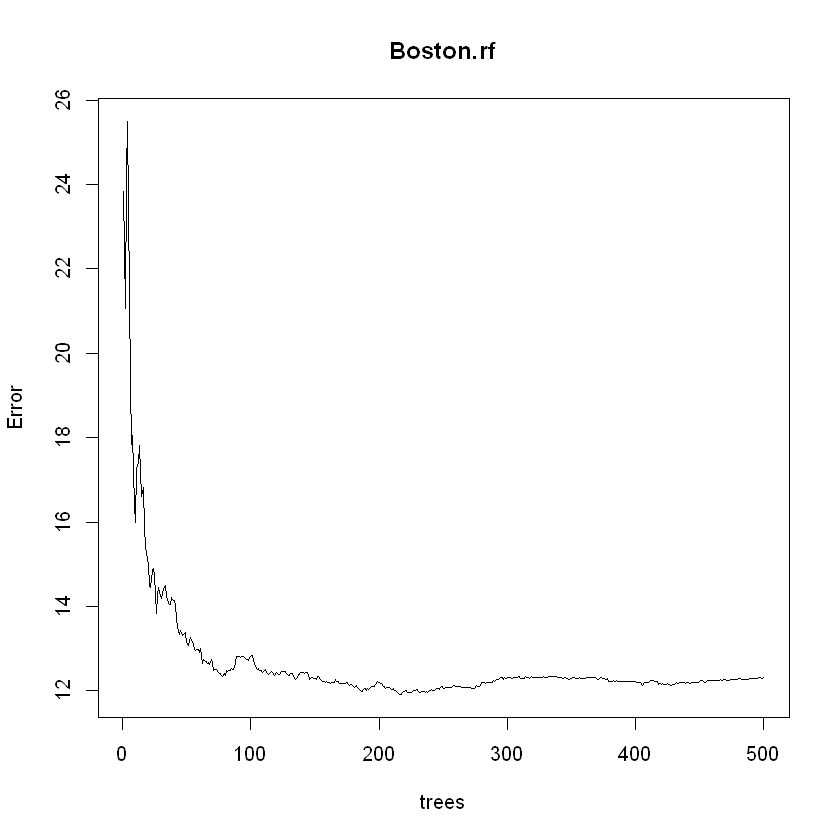

In [1]:
require(randomForest)
require(MASS)#Package which contains the Boston housing dataset
attach(Boston)
set.seed(101)

#training Sample with 300 observations
train=sample(1:nrow(Boston),300)

Boston.rf=randomForest(medv ~ . , data = Boston, subset = train)
plot(Boston.rf)

# getTree(Boston.rf)
importance(Boston.rf)


* Consistency of random forest is not proved
until Scornet, Biau, and Vert (2015)
* Inferential theory was first established by
Wager Athey (2018)  in the context of treatment effect estimation
* Athey, Tibshirani, and Wager (2019) generalizes CART to local maximum likelihood.

## Gradient Boosting

* Bagging and random forest use equal weight on each generated tree for the ensemble
* Tree boosting takes a deterministic approach for the weights
    1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
   $\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
   the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
    2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
   the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
    3. Repeat Step 2 until $m > M$.

* Boosting has three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$
* The algorithm can be sensitive to any of the three tuning parameters
* When a model is tuned well, it can performs remarkably
    * Example: Beijing housing data.
    * Gradient boosting via the package `gbm`

Statisticians view boosting as a gradient descent algorithm to reduce the risk. The fitted
tree in each iteration is the deepest descent direction, while the shrinkage tames the fitting to avoid proceeding too aggressively.

In [2]:
library(caret)
library(doParallel)

load("lianjia.RData")

price_reg=price~
  t_trade+age+fiveYearsProperty+subway+factor(district)+dist_center+
  square+livingRoom+drawingRoom+kitchen+bathRoom+
  factor(floor_type)+floor_total+elevator+ladderRatio+
  factor(renovationCondition)+factor(buildingType)+factor(buildingStructure)+
  communityAverage+DOM+followers

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Warning message in readChar(con, 5L, useBytes = TRUE):
"cannot open compressed file 'lianjia.RData', probable reason 'No such file or directory'"

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [ ]:
# GBM
## Tuning Parameters

gbmGrid=expand.grid(interaction.depth=10:14,
                    n.trees=(15:20)*100,
                    shrinkage=c(0.01,0.05,0.1),
                    n.minobsinnode=20)
gbmControl=trainControl(method="repeatedcv",number=5,repeats=1)

registerDoParallel(8)
t=Sys.time()
boostingReg=train(price_reg,data=lianjia[train_tune,],
                  method="gbm",distribution="gaussian",
                  trControl=gbmControl,tuneGrid=gbmGrid,metric="Rsquared",
                  verbose=F)
cat("Time Cost of Finding Best Tuning Parameters:",Sys.time()-t,"\n")
stopImplicitCluster()

gbmTune=boostingReg$bestTune
cat("The best tuning parameters for GBM are: \n");print(gbmTune)

In [ ]:
## Estimation and Prediction

train_ind=createDataPartition(1:nrow(lianjia),p=0.75)$Resample1
boostingReg=train(price_reg,data=lianjia[train_ind,],method="gbm",
                  distribution="gaussian", # to decide the lost function
                  tuneGrid=gbmTune,verbose=F)
pred.boosting=predict(boostingReg,newdata=lianjia[-train_ind,])

In [ ]:
# LM

lmReg=lm(price_reg,data=lianjia[train_ind,])
pred.lm=predict(lmReg,newdata=lianjia[-train_ind,])


# Comparison

target=lianjia[-train_ind,]$price
cat("R-squared of GBM prediction =",miscTools::rSquared(target,target-pred.boosting),"\n")
cat("R-squared of LM prediction =",miscTools::rSquared(target,target-pred.lm),"\n")

* Many variants of boosting algorithms
    * $L_2$-boosting
    * componentwise boosting
    * AdaBoosting, etc

## Neural Network

* Artificial neural network (ANN) is the workhorse behind Alpha-Go and self-driven cars
* A particular type of nonlinear models.

![ANN](Colored_neural_network.png)

* The transition from layer $k-1$ to layer $k$ can be written as

$$
\begin{eqnarray*}
z_l^{(k)} & = & w_{l0}^{(k-1)} + \sum_{j=1}^{p_{k-1} } w_{lj}^{(k-1)} a_j^{(k-1)} \\ 
a_l^{(k)} & = & g^{(k)} ( z_l^{(k)}), 
\end{eqnarray*}
$$

where $ a_j^{(0)} = x_j$ is the input.

* The latent variable $z_l^{(k)}$ usually takes a linear form
* *Activation function* $g(\cdot)$ is usually a simple nonlinear function
* Popular choice: sigmoid ($1/(1+\exp(-x))$); ReLu, $z\cdot 1\{x\geq 0\}$)

A user has several decisions to make
* Activation function
* Number of hidden layers
* Number of nodes in each layer


* Many free parameters are generated from the multiple layer and multiple nodes
* In estimation often regularization methods are employed to penalize
the $l_1$ and/or $l_2$ norms, which requires extra tuning parameters

#  Theory is Underdeveloped

* Theoretical understanding about its behavior is scant
* Hornik, Stinchcombe, and White (1989):
    * A single hidden layer neural network, given enough many nodes, is a *universal approximator* for any
measurable function.

# Computation

* Free parameters must be determined by
numerical optimization
* Nonlinear complex structure makes the optimization
very challenging and the global optimizer is beyond guarantee
* De facto optimization algorithm
is *stochastic gradient descent*

* Google's `tensorflow`
* `keras` is the deep learning modeling language

## Stochastic Gradient Descent (SGD)

In optimization we update the parameter
$$
\beta_{k+1} = \beta_{k} + a_k p_k,
$$
where $a_k \in \mathbb{R}$ is the step length and $p_k$ is a vector
of directions. 

Use a Talyor expansion,
$$
f(\beta_{k+1}) = f(\beta_k + a_k p_k ) \approx f(\beta_k) + a_k \nabla f(\beta_k) p_k,
$$


If in each step we want the value of the criterion function
$f(x)$ to decrease, we need $\nabla f(\beta_k) p_k \leq 0$.
A simple choice is $p_k =-\nabla f(\beta_k)$.

Newton's method corresponds to $p_k =- (\nabla^2 f(\beta_k))^{-1}  \nabla f(\beta_k)$,
and BFGS uses a low-rank matrix to approximate $\nabla^2 f(\beta_k)$.

* When sample size and/or number of parameter is big, evaluation of the gradient can be prohibitively expensive.
* SGD uses a small batch of the sample to evaluate the gradient in each iteration. 

* SGD involves tuning parameters (say, the batch size and the learning rate) that can dramatically affect
the outcome, in particular in nonlinear problems.
* Careful experiments must be carried out before serious implementation.

Below is an example of SGD in the PPMLE with sample size 100,000 and
the number of parameters 100. SGD is usually much faster.

The new functions are defined with the data explicity as arguments.
Because in SGD each time the log-likelihood function and the gradiant are
evaluated at a different subsample.

In [ ]:
poisson.loglik = function( b, y, X ) {
  b = as.matrix( b )
  lambda =  exp( X %*% b )
  ell = -mean( -lambda + y *  log(lambda) )
  return(ell)
}


poisson.loglik.grad = function( b, y, X ) {
  b = as.matrix( b )
  lambda =  as.vector( exp( X %*% b ) )
  ell = -colMeans( -lambda * X + y * X )
  ell_eta = ell
  return(ell_eta)
}

In [ ]:
##### generate the artificial data
set.seed(898)
nn = 1e5; K = 100

X = cbind(1, matrix( runif( nn*(K-1) ), ncol = K-1 ) )
b0 = rep(1, K) / K
y = rpois(nn, exp( X %*% b0 ) )


b.init = runif(K); b.init  = 2 * b.init / sum(b.init)

In [ ]:
# and these tuning parameters are related to N and K

n = length(y)
test_ind = sample(1:n, round(0.2*n) )

y_test = y[test_ind]
X_test = X[test_ind, ]

y_train = y[-test_ind ]
X_train = X[-test_ind, ]

In [ ]:
# optimization parameters

# sgd depends on
# * eta: the learning rate
# * epoch: the averaging small batch
# * the initial value

set.seed(105)

max_iter = 5000
min_iter = 20
eta=0.01
epoch = round( 100*sqrt(K) )


b_old = b.init

pts0 = Sys.time()
# the iteration of gradient
for (i in 1:max_iter ){

  loglik_old = poisson.loglik(b_old, y_train, X_train)
  i_sample = sample(1:length(y_train), epoch, replace = TRUE )
  b_new = b_old - eta * poisson.loglik.grad(b_old, y_train[i_sample], X_train[i_sample, ])
  loglik_new = poisson.loglik(b_new, y_test, X_test)
  b_old = b_new # update

  criterion =  loglik_old - loglik_new  
  if (  criterion < 0.0001 & i >= min_iter ) break
}
cat("point estimate =", b_new, ", log_lik = ", loglik_new, "\n")
pts1 = Sys.time( ) - pts0
print(pts1)

In [ ]:
# optimx is too slow for this dataset.
# Nelder-Mead method is too slow for this dataset

# thus we only sgd with NLoptr

opts = list("algorithm"="NLOPT_LD_SLSQP","xtol_rel"=1.0e-7, maxeval = 5000)


pts0 = Sys.time( )
res_BFGS = nloptr::nloptr( x0=b.init,
                 eval_f=poisson.loglik,
                 eval_grad_f = poisson.loglik.grad,
                 opts=opts,
                 y = y_train, X = X_train)
print( res_BFGS )
pts1 = Sys.time( ) - pts0
print(pts1)

b_hat_nlopt = res_BFGS$solution


#### evaluation in the test sample
cat("\n\n\n\n\n\n\n")
cat("log lik in test data by sgd = ", poisson.loglik(b_new, y = y_test, X_test), "\n")
cat("log lik in test data by nlopt = ", poisson.loglik(b_hat_nlopt, y = y_test, X_test), "\n")
cat("log lik in test data by oracle = ", poisson.loglik(b0, y = y_test, X_test), "\n")

# Summary

* Mature algorithms for implementation
* Theoretical investigation is in progress
* Economic applications are just beginning

* Lehrer and Xie (2017) 
* Feng, Giglio, and Xiu (2019)
* Chinco, Clark-Joseph, and Ye (2019)